In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib_inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('Loan Eligibility Prediction.csv')
df.head()

,Customer_ID,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,569,Female,No,0,Graduate,No,2378,0.0,9,360,1,Urban,N
1,15,Male,Yes,2,Graduate,No,1299,1086.0,17,120,1,Urban,Y
2,95,Male,No,0,Not Graduate,No,3620,0.0,25,120,1,Semiurban,Y
3,134,Male,Yes,0,Graduate,Yes,3459,0.0,25,120,1,Semiurban,Y
4,556,Male,Yes,1,Graduate,No,5468,1032.0,26,360,1,Semiurban,Y


In [3]:
df.sample()

,Customer_ID,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
534,213,Male,Yes,1,Graduate,Yes,7787,0.0,240,360,1,Urban,Y


In [4]:
df.tail()

,Customer_ID,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,480,Male,Yes,2,Graduate,No,2947,1603.0,10,360,1,Urban,N
610,525,Male,No,0,Graduate,No,4680,2087.0,15,360,1,Semiurban,N
611,551,Male,Yes,2,Graduate,Yes,6633,0.0,25,360,0,Rural,N
612,552,Male,Yes,1,Not Graduate,No,2492,2375.0,30,360,1,Rural,Y
613,606,Male,Yes,0,Not Graduate,No,2400,3800.0,25,180,1,Urban,N


In [5]:
df.isnull().sum()

Customer_ID           0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
Applicant_Income      0
Coapplicant_Income    0
Loan_Amount           0
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Customer_ID         614 non-null    int64  
 1   Gender              614 non-null    object 
 2   Married             614 non-null    object 
 3   Dependents          614 non-null    int64  
 4   Education           614 non-null    object 
 5   Self_Employed       614 non-null    object 
 6   Applicant_Income    614 non-null    int64  
 7   Coapplicant_Income  614 non-null    float64
 8   Loan_Amount         614 non-null    int64  
 9   Loan_Amount_Term    614 non-null    int64  
 10  Credit_History      614 non-null    int64  
 11  Property_Area       614 non-null    object 
 12  Loan_Status         614 non-null    object 
dtypes: float64(1), int64(6), object(6)
memory usage: 62.5+ KB


In [7]:
df.shape

(614, 13)

In [8]:
df.duplicated().sum()

np.int64(0)

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Customer_ID,614.0,307.500000,177.390811,1.0,154.25,307.5,460.75,614.0
Dependents,614.0,0.856678,1.216651,0.0,0.00,0.0,2.00,4.0
Applicant_Income,614.0,5403.459283,6109.041673,150.0,2877.50,3812.5,5795.00,81000.0
Coapplicant_Income,614.0,1621.245798,2926.248369,0.0,0.00,1188.5,2297.25,41667.0
Loan_Amount,614.0,142.022801,87.083089,9.0,98.00,125.0,164.75,700.0
Loan_Amount_Term,614.0,338.892508,69.716355,12.0,360.00,360.0,360.00,480.0
Credit_History,614.0,0.850163,0.357203,0.0,1.00,1.0,1.00,1.0


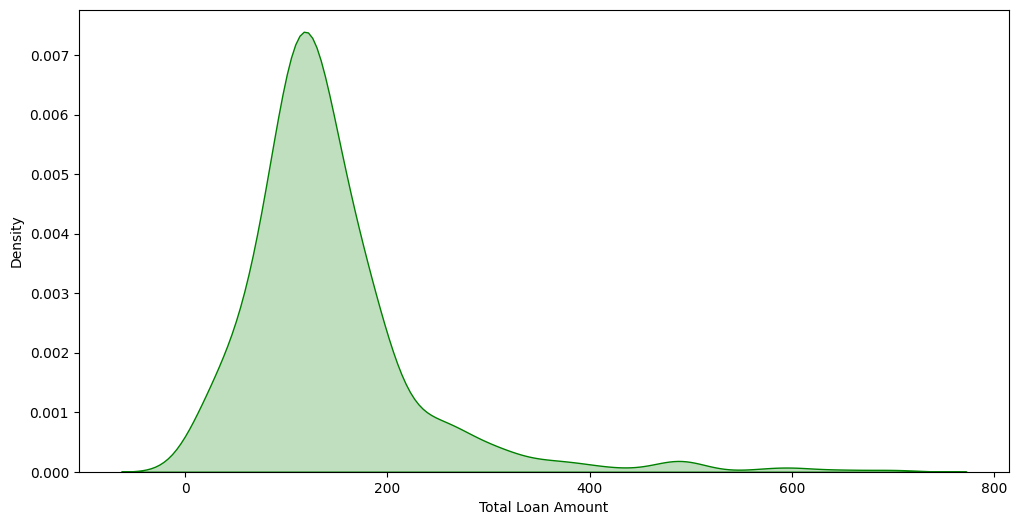

In [10]:
plt.figure(figsize=(12,6))
sns.kdeplot(df['Loan_Amount'], fill=True, color='green')
plt.xlabel('Total Loan Amount')
plt.ylabel('Density')
plt.show()

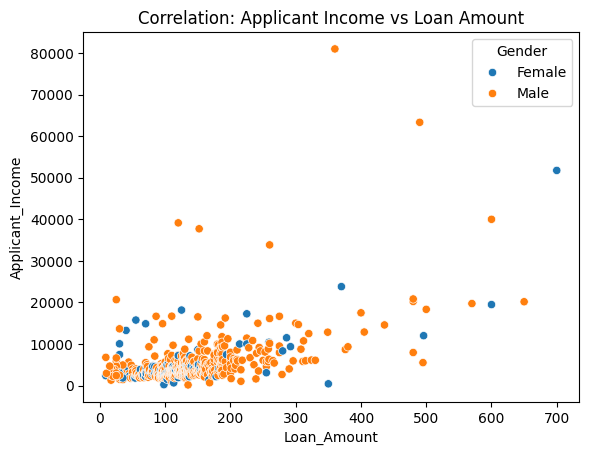

In [11]:
sns.scatterplot(df, x='Loan_Amount', y='Applicant_Income', hue='Gender')
plt.title('Correlation: Applicant Income vs Loan Amount')
plt.show()

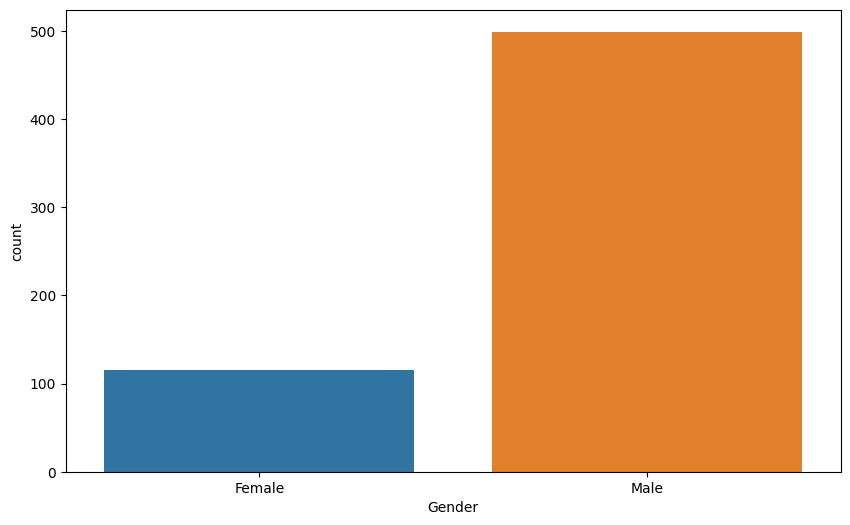

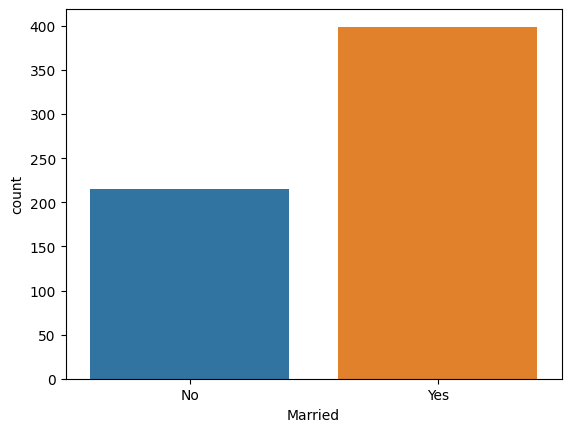

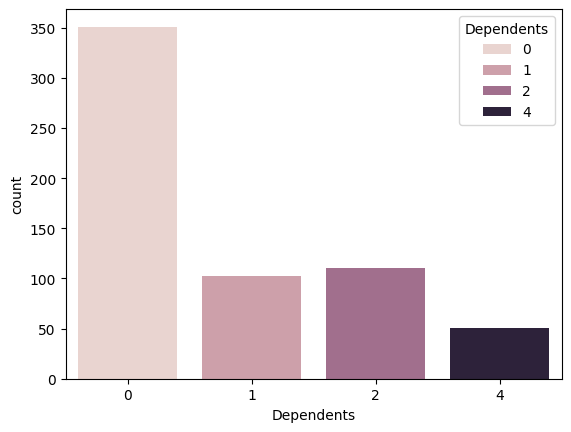

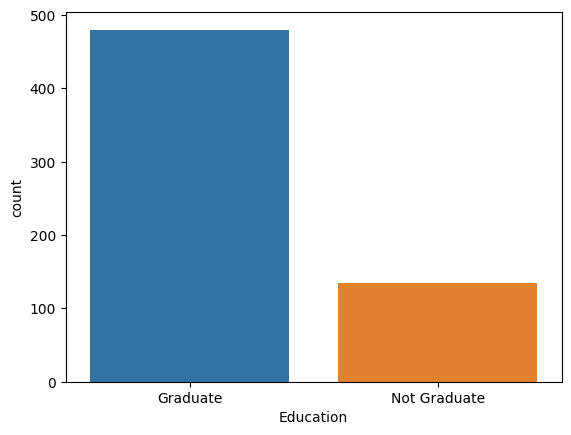

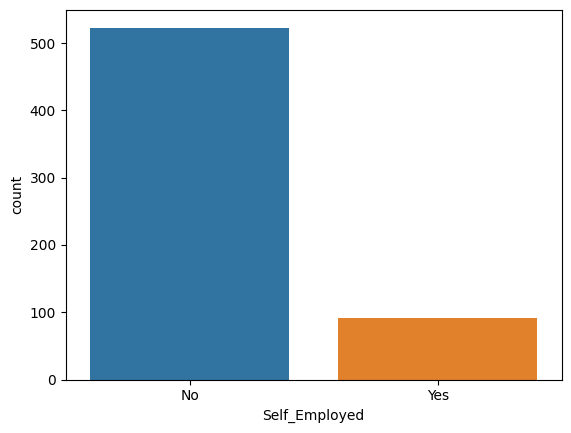

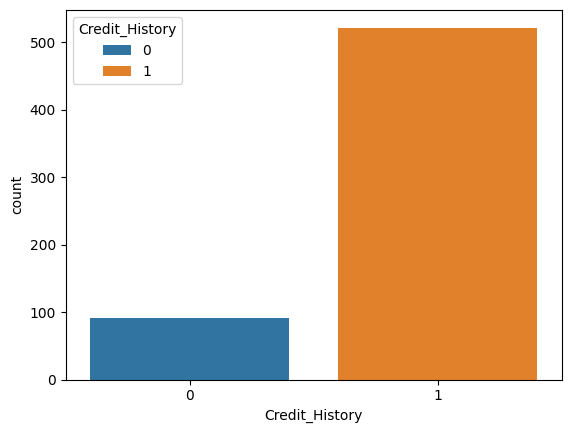

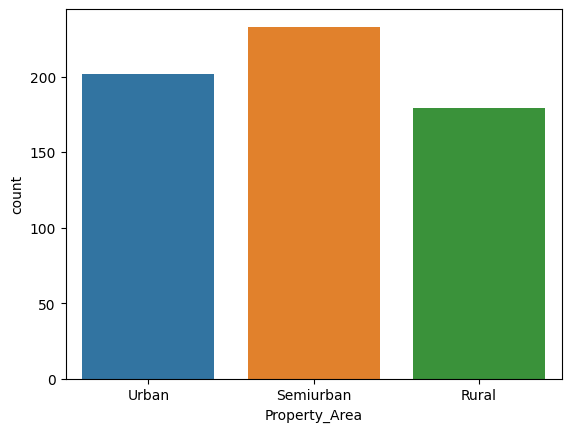

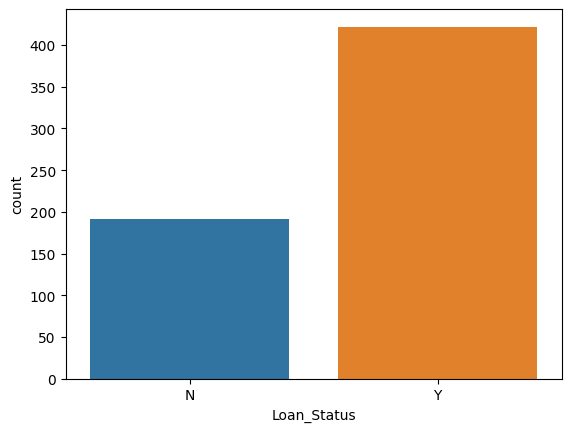

In [12]:
plt.figure(figsize=(10,6))
for col in ['Gender','Married','Dependents','Education','Self_Employed','Credit_History','Property_Area','Loan_Status']:
    sns.countplot(df, x=col, hue=col)
    plt.show()

In [13]:
df.groupby('Gender')['Married'].value_counts()

Gender  Married
Female  No          82
        Yes         33
Male    Yes        366
        No         133
Name: count, dtype: int64

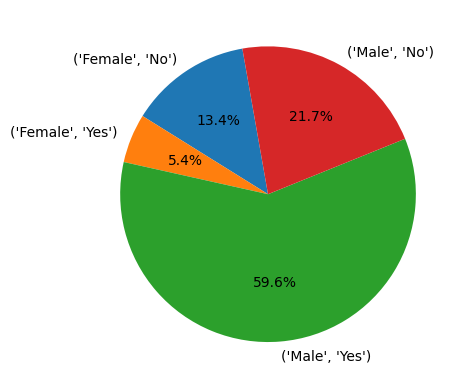

In [14]:
count=df.groupby('Gender')['Married'].value_counts()
plt.pie(count, labels=count.index, autopct='%1.1f%%', startangle=100)
plt.show()

In [15]:
df.groupby('Gender')['Dependents'].value_counts()

Gender  Dependents
Female  0              83
        1              19
        2               7
        4               6
Male    0             268
        2             103
        1              83
        4              45
Name: count, dtype: int64

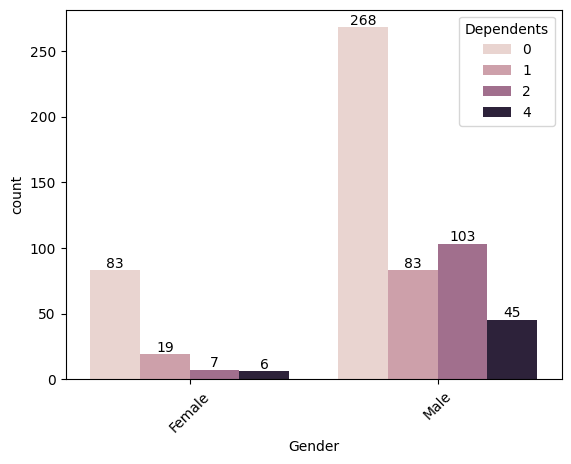

In [16]:
ax=sns.countplot(df, x='Gender', hue='Dependents')
for bars in ax.containers:
    ax.bar_label(bars)
    plt.xticks(rotation=45)
plt.show()    


In [17]:
df.groupby('Gender')['Education'].value_counts()

Gender  Education   
Female  Graduate         95
        Not Graduate     20
Male    Graduate        385
        Not Graduate    114
Name: count, dtype: int64

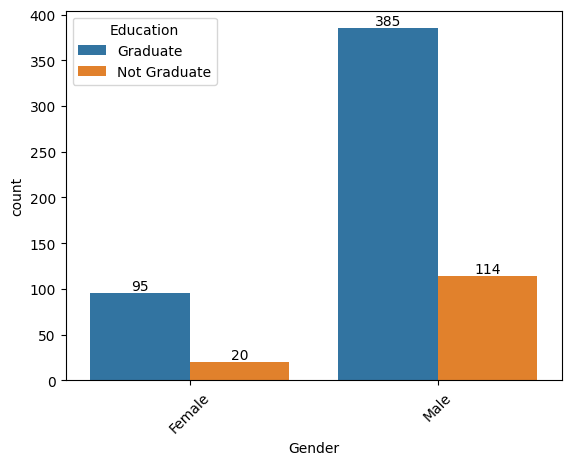

In [18]:
ax=sns.countplot(df, x='Gender', hue='Education')
for bars in ax.containers:
    ax.bar_label(bars)
    plt.xticks(rotation=45)
plt.show()

In [19]:
df.groupby('Gender')['Self_Employed'].value_counts()

Gender  Self_Employed
Female  No                95
        Yes               20
Male    No               428
        Yes               71
Name: count, dtype: int64

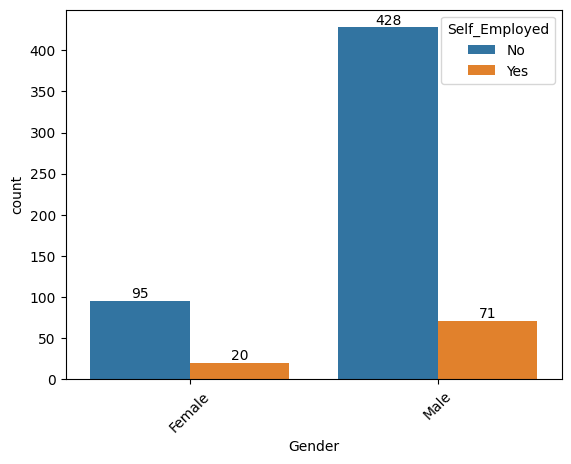

In [20]:
ax=sns.countplot(df, x='Gender', hue='Self_Employed')
for bars in ax.containers:
    ax.bar_label(bars)
    plt.xticks(rotation=45)
plt.show()

In [21]:
df.groupby('Gender')['Credit_History'].value_counts()

Gender  Credit_History
Female  1                  96
        0                  19
Male    1                 426
        0                  73
Name: count, dtype: int64

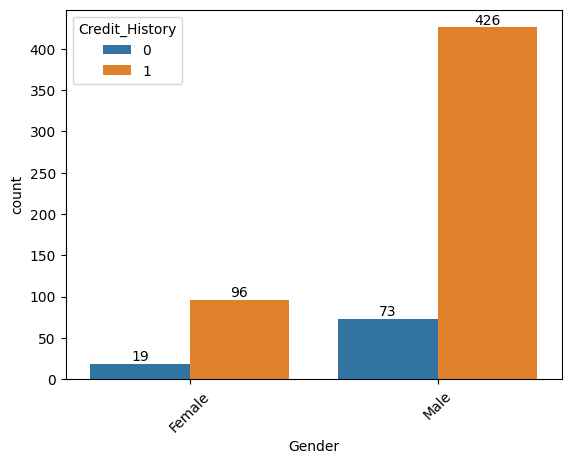

In [22]:
ax=sns.countplot(df, x='Gender', hue='Credit_History')
for bars in ax.containers:
    ax.bar_label(bars)
    plt.xticks(rotation=45)
plt.show()

In [23]:
df.groupby('Gender')['Property_Area'].value_counts()

Gender  Property_Area
Female  Semiurban         56
        Urban             34
        Rural             25
Male    Semiurban        177
        Urban            168
        Rural            154
Name: count, dtype: int64

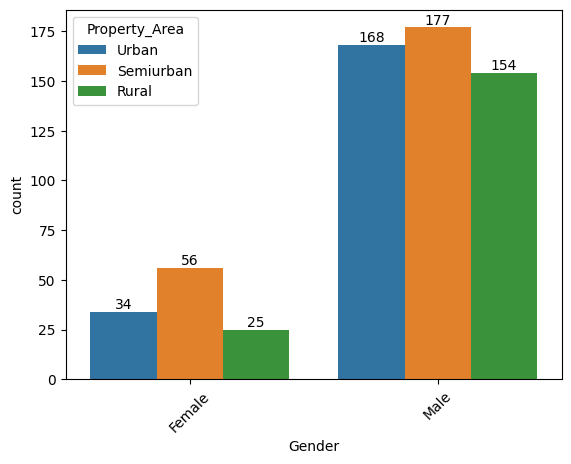

In [24]:
ax=sns.countplot(df, x='Gender', hue='Property_Area')
for bars in ax.containers:
    ax.bar_label(bars)
    plt.xticks(rotation=45)
plt.show()

In [25]:
df.groupby('Gender')['Loan_Status'].value_counts()

Gender  Loan_Status
Female  Y               78
        N               37
Male    Y              344
        N              155
Name: count, dtype: int64

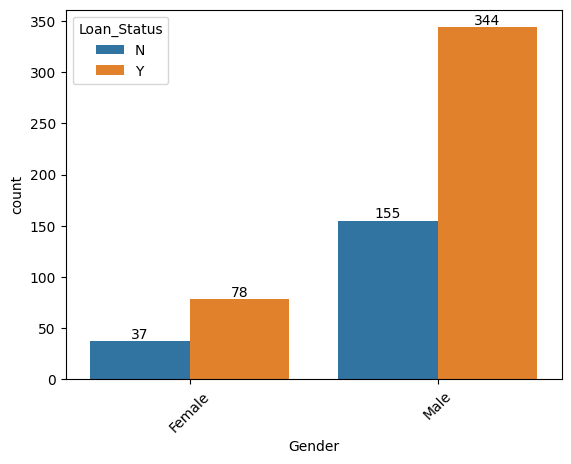

In [26]:
ax=sns.countplot(df, x='Gender', hue='Loan_Status')
for bars in ax.containers:
    ax.bar_label(bars)
    plt.xticks(rotation=45)
plt.show()

In [27]:
def distplots(col):
    sns.distplot(df[col])
    plt.show()

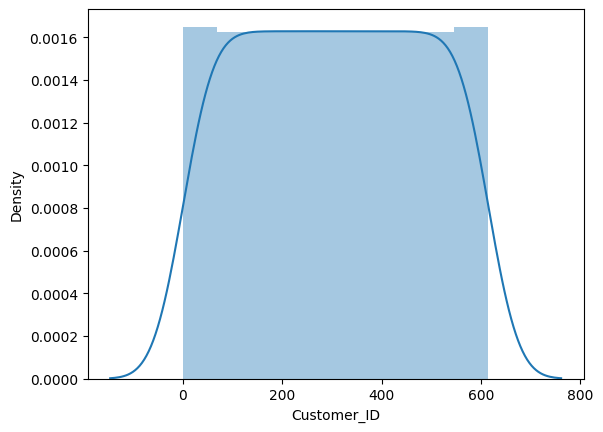

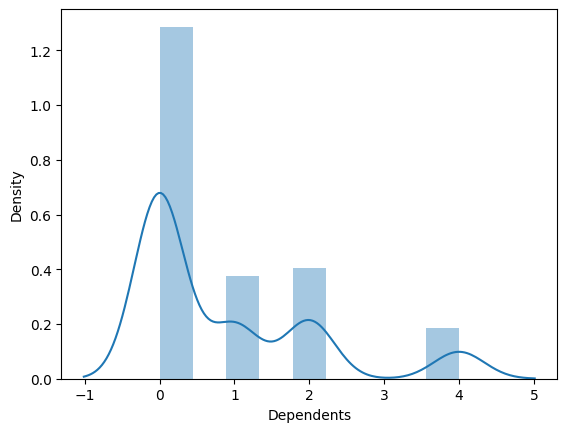

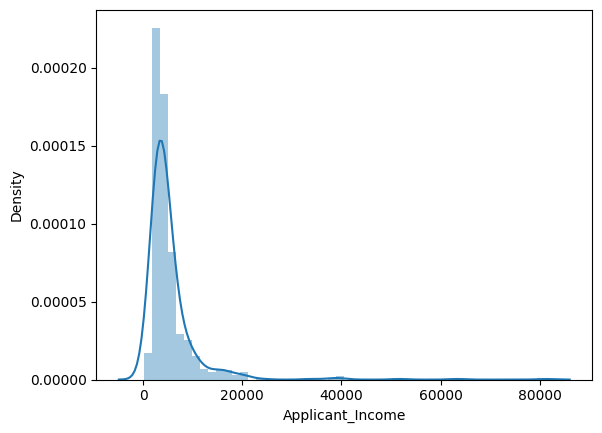

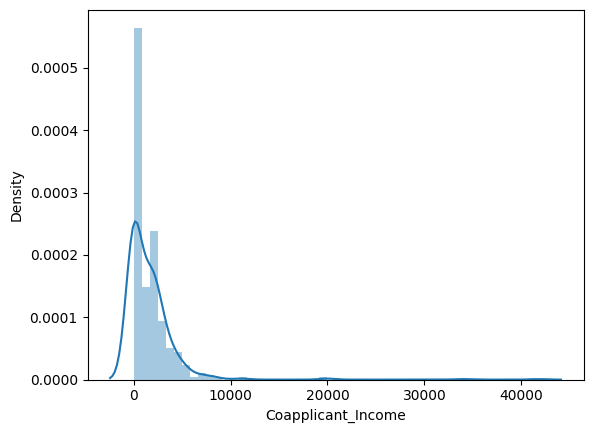

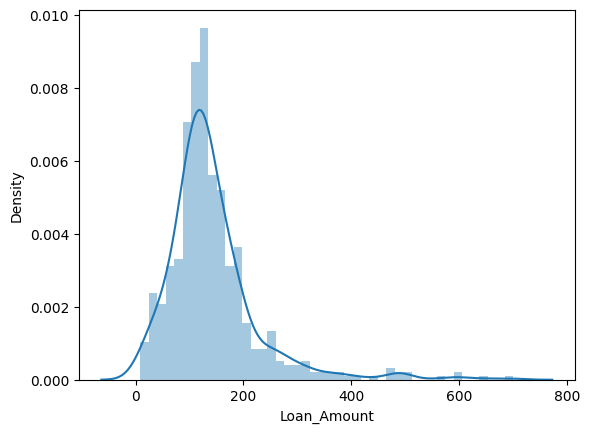

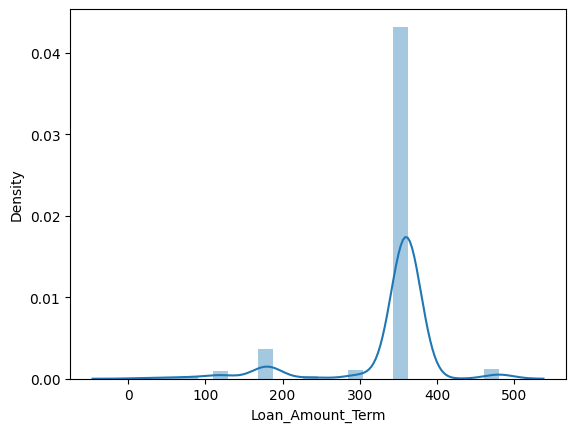

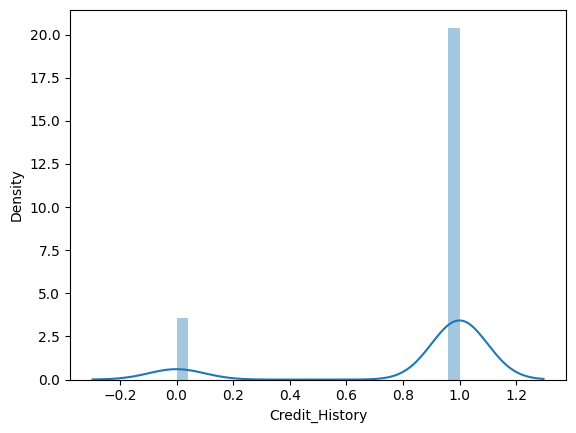

In [28]:
for i in list(df.select_dtypes(exclude=['object']).columns):
    distplots(i)

In [29]:
from sklearn.preprocessing import LabelEncoder
oe=LabelEncoder()
df['Education']=oe.fit_transform(df['Education'])
df['Self_Employed']=oe.fit_transform(df['Self_Employed'])
df['Property_Area']=oe.fit_transform(df['Property_Area'])
df['Loan_Status']=oe.fit_transform(df['Loan_Status'])
df['Married']=oe.fit_transform(df['Married'])

In [30]:
encode_gender=pd.get_dummies(df['Gender'], prefix='Gender', dtype=int)
df_encoded=pd.concat([df, encode_gender], axis=1)
df_encoded=df_encoded.drop('Gender', axis=1)
df_encoded.head()

,Customer_ID,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Gender_Female,Gender_Male
0,569,0,0,0,0,2378,0.0,9,360,1,2,0,1,0
1,15,1,2,0,0,1299,1086.0,17,120,1,2,1,0,1
2,95,0,0,1,0,3620,0.0,25,120,1,1,1,0,1
3,134,1,0,0,1,3459,0.0,25,120,1,1,1,0,1
4,556,1,1,0,0,5468,1032.0,26,360,1,1,1,0,1


In [31]:
from scipy.stats import spearmanr
spearman_corr,p_value = spearmanr(df_encoded['Education'], df_encoded['Loan_Status'])
print(f'Spearman Correlation (rho): {spearman_corr:.4f}')
print(f'P-Value: {p_value:.4f}')

Spearman Correlation (rho): -0.0859
P-Value: 0.0334


In [32]:
spearman_corr,p_value = spearmanr(df_encoded['Applicant_Income'], df_encoded['Loan_Status'])
print(f'Spearman Correlation (rho): {spearman_corr:.4f}')
print(f'P-Value: {p_value:.4f}')

Spearman Correlation (rho): -0.0042
P-Value: 0.9180


In [33]:
spearman_corr,p_value = spearmanr(df_encoded['Coapplicant_Income'], df_encoded['Loan_Status'])
print(f'Spearman Correlation (rho): {spearman_corr:.4f}')
print(f'P-Value: {p_value:.4f}')

Spearman Correlation (rho): 0.0350
P-Value: 0.3872


In [34]:
spearman_corr,p_value = spearmanr(df_encoded['Credit_History'], df_encoded['Loan_Status'])
print(f'Spearman Correlation (rho): {spearman_corr:.4f}')
print(f'P-Value: {p_value:.4f}')

Spearman Correlation (rho): 0.5240
P-Value: 0.0000


In [35]:
spearman_corr,p_value = spearmanr(df_encoded['Property_Area'], df_encoded['Loan_Status'])
print(f'Spearman Correlation (rho): {spearman_corr:.4f}')
print(f'P-Value: {p_value:.4f}')

Spearman Correlation (rho): 0.0298
P-Value: 0.4610


In [36]:
x=df_encoded.drop(columns={'Customer_ID','Loan_Status'})
y=df_encoded['Loan_Status']

In [37]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, accuracy_score
from sklearn.model_selection import cross_val_score

In [38]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.3, random_state=3)

In [39]:
from sklearn.preprocessing import StandardScaler
sca=StandardScaler()
x=sca.fit(x)

In [40]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [41]:
yhat_train_lr=lr.predict(x_train)
yhat_test_lr=lr.predict(x_test)

In [42]:
print(classification_report(y_train, yhat_train_lr))
print()
print(classification_report(y_test, yhat_test_lr))

              precision    recall  f1-score   support

           0       0.86      0.43      0.57       126
           1       0.80      0.97      0.88       303

    accuracy                           0.81       429
   macro avg       0.83      0.70      0.73       429
weighted avg       0.82      0.81      0.79       429


              precision    recall  f1-score   support

           0       0.93      0.42      0.58        66
           1       0.75      0.98      0.85       119

    accuracy                           0.78       185
   macro avg       0.84      0.70      0.72       185
weighted avg       0.82      0.78      0.76       185



In [43]:
print(confusion_matrix(y_train, yhat_train_lr))
print()
print(confusion_matrix(y_test, yhat_test_lr))

[[ 54  72]
 [  9 294]]

[[ 28  38]
 [  2 117]]


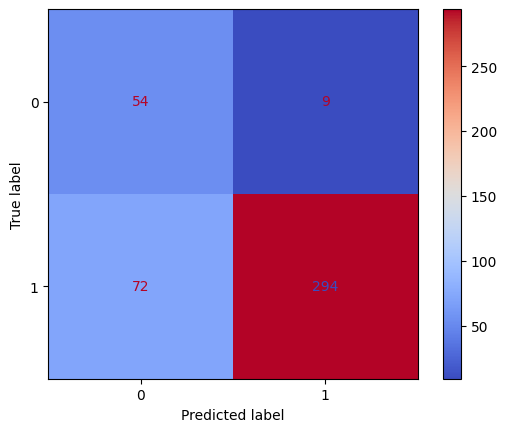

In [44]:
c_matrix=ConfusionMatrixDisplay(confusion_matrix(yhat_train_lr, y_train))
c_matrix.plot(cmap='coolwarm')

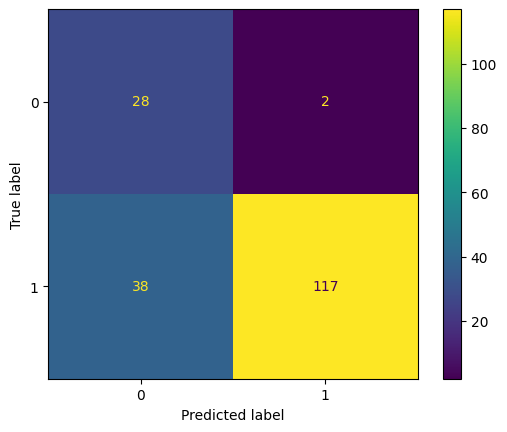

In [45]:
c_matrix=ConfusionMatrixDisplay(confusion_matrix(yhat_test_lr, y_test))
c_matrix.plot(cmap='viridis')

In [46]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
rfc.fit(x_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [47]:
yhat_train_rfc=rfc.predict(x_train)
yhat_test_rfc=rfc.predict(x_test)

In [48]:
print(classification_report(y_train, yhat_train_rfc))
print()
print(classification_report(y_test, yhat_test_rfc))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       126
           1       1.00      1.00      1.00       303

    accuracy                           1.00       429
   macro avg       1.00      1.00      1.00       429
weighted avg       1.00      1.00      1.00       429


              precision    recall  f1-score   support

           0       0.88      0.42      0.57        66
           1       0.75      0.97      0.85       119

    accuracy                           0.77       185
   macro avg       0.81      0.70      0.71       185
weighted avg       0.80      0.77      0.75       185



In [49]:
print(confusion_matrix(y_train, yhat_train_rfc))
print()
print(confusion_matrix(y_test, yhat_test_rfc))

[[126   0]
 [  0 303]]

[[ 28  38]
 [  4 115]]


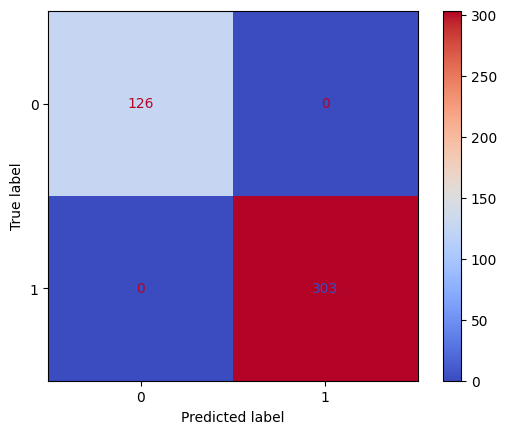

In [50]:
c_matrix=ConfusionMatrixDisplay(confusion_matrix(yhat_train_rfc, y_train))
c_matrix.plot(cmap='coolwarm')
plt.show()

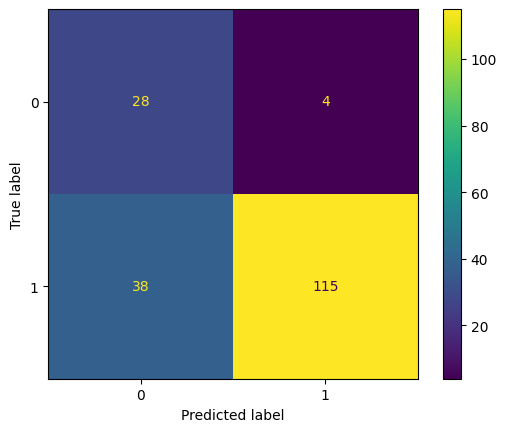

In [51]:
c_matrix=ConfusionMatrixDisplay(confusion_matrix(yhat_test_rfc, y_test))
c_matrix.plot(cmap='viridis')
plt.show()

In [52]:
from sklearn.svm import SVC
s2=SVC(kernel='linear')
s2.fit(x_train, y_train)

,C,1.0
,kernel,'linear'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [53]:
yhat_train_s2=s2.predict(x_train)
yhat_test_s2=s2.predict(x_test)

In [54]:
print(classification_report(y_train, yhat_train_s2))
print()
print(classification_report(y_test, yhat_test_s2))

              precision    recall  f1-score   support

           0       0.88      0.39      0.54       126
           1       0.79      0.98      0.88       303

    accuracy                           0.80       429
   macro avg       0.83      0.68      0.71       429
weighted avg       0.82      0.80      0.78       429


              precision    recall  f1-score   support

           0       0.87      0.30      0.45        66
           1       0.72      0.97      0.83       119

    accuracy                           0.74       185
   macro avg       0.79      0.64      0.64       185
weighted avg       0.77      0.74      0.69       185



In [55]:
print(confusion_matrix(y_train, yhat_train_s2))
print()
print(confusion_matrix(y_test, yhat_test_s2))

[[ 49  77]
 [  7 296]]

[[ 20  46]
 [  3 116]]


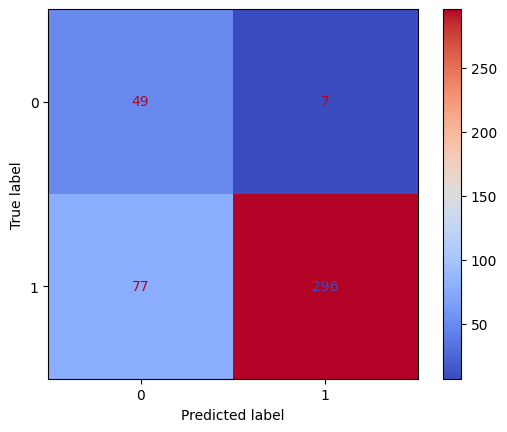

In [56]:
c_matrix=ConfusionMatrixDisplay(confusion_matrix(yhat_train_s2, y_train))
c_matrix.plot(cmap='coolwarm')
plt.show()

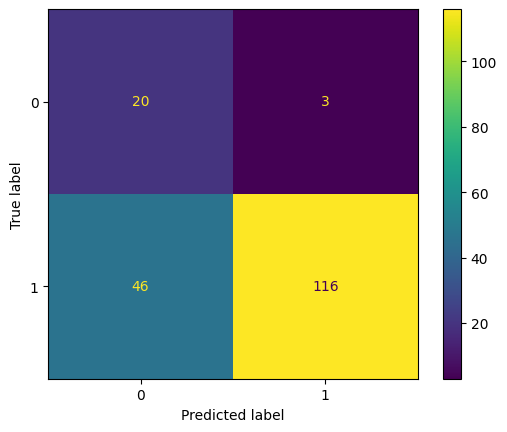

In [58]:
c_matrix=ConfusionMatrixDisplay(confusion_matrix(yhat_test_s2, y_test))
c_matrix.plot(cmap='viridis')
plt.show()

In [59]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()
dtc.fit(x_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [60]:
yhat_train_dtc=dtc.predict(x_train)
yhat_test_dtc=dtc.predict(x_test)

In [61]:
print(classification_report(y_train, yhat_train_dtc))
print()
print(classification_report(y_test, yhat_test_dtc))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       126
           1       1.00      1.00      1.00       303

    accuracy                           1.00       429
   macro avg       1.00      1.00      1.00       429
weighted avg       1.00      1.00      1.00       429


              precision    recall  f1-score   support

           0       0.60      0.50      0.55        66
           1       0.75      0.82      0.78       119

    accuracy                           0.70       185
   macro avg       0.67      0.66      0.66       185
weighted avg       0.69      0.70      0.70       185



In [62]:
print(confusion_matrix(y_train, yhat_train_dtc))
print()
print(confusion_matrix(y_test, yhat_test_dtc))

[[126   0]
 [  0 303]]

[[33 33]
 [22 97]]


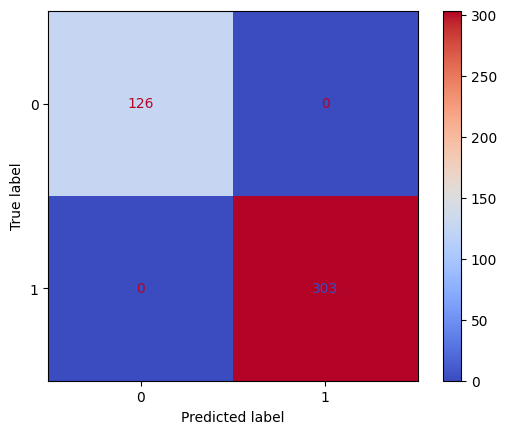

In [63]:
c_matrix=ConfusionMatrixDisplay(confusion_matrix(yhat_train_dtc, y_train))
c_matrix.plot(cmap='coolwarm')
plt.show()

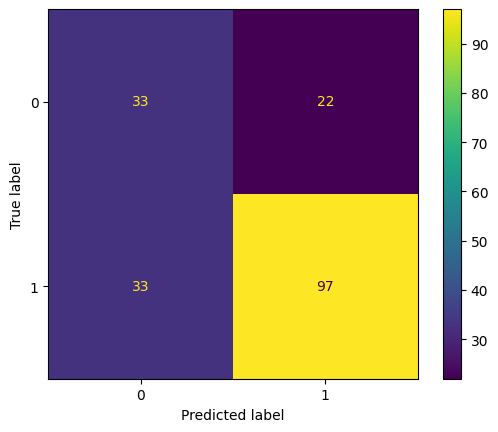

In [64]:
c_matrix=ConfusionMatrixDisplay(confusion_matrix(yhat_test_dtc, y_test))
c_matrix.plot(cmap='viridis')
plt.show()